# Композиция деревьев

### 1) Основные недостатки решающих деревьев

Если взять сложную выборку и обучить на ней решающее дерево до конца, то есть пока в каждом из лепестков
не останется по одному объекту, получившаяся разделяющая поверхность будет очень сложной:
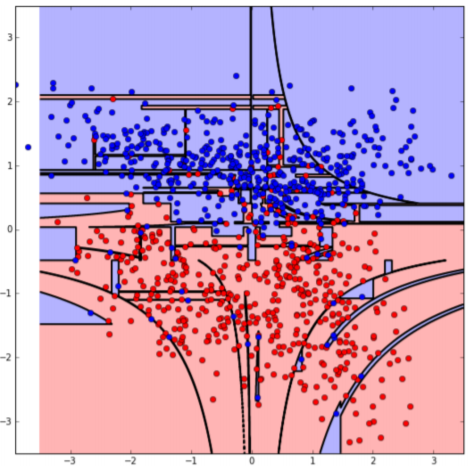

Что происходит, когда мы немного меняем обучающую выборку, например выкидываем пару объектов:
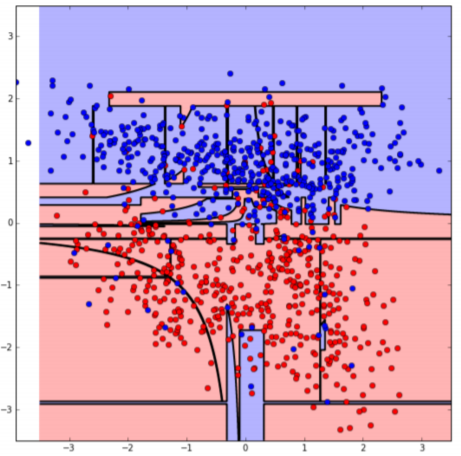

#### Какие выводы можно сделать:
1)сильно переобучается;

2)сильно меняется при небольшом изменении выборки;

На самом деле, второй пункт можно будет превратить в достоинство с помощью композиции.

### 2) Композиция алгоритмов
**Композиция** — это объединение $N$ алгоритмов $b_1(x), ..., b_N (x)$ в один. Идея заключается в том, чтобы обучить
алгоритмы $b_1(x), ..., b_N (x)$, а затем усреднить полученные от них ответы:

для задачи регресси: $$a(x) = {1\over{N}} \cdot \sum_{n=1}^N b_n(x)$$

для задачи классификации: $$a(x) = sign ( {1\over{N}} \cdot \sum_{n=1}^N b_n(x))$$

Алгоритм a(x), который возвращает среднее или знак среднего, называется композицией N алгоритмов b1(x), ..., bN (x),
а они сами называются базовыми алгоритмами.

### 3) Рандомизация
Чтобы построить композицию, нужно сначала обучить $N$ базовых алгоритмов, причем их нельзя обучать на
всей обучающей выборке, так как в этом случае они получаются одинаковыми, и в их усреднении не будет
никакого смысла.

Способы проведения рандомизации:

1) обучать базовые алгоритмы на разных подвыборках обучающей выборки

2) Бутстрап

3) генерация случайного подмножества обучающей выборки

### 4) Композиция деревьев
Если с помощью бутстрапа построить 100 базовых решающих деревьев и объединить их в композицию, разделяющая поверхность будет все еще сложная, но уже гораздо менее переобученная:
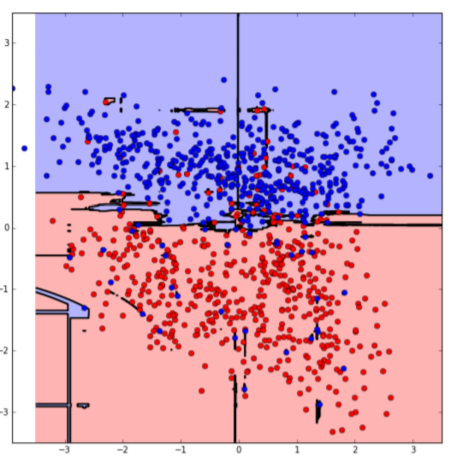
Разделяющая поверхность уже не подгоняется под большую часть попавших в гущу чужого класса объектов
и в целом хорошо разделяет два класса. Увеличением количества базовых алгоритмов можно устранить
оставшиеся погрешности.

# Смещение и разброс
Постараемся глубже понять причины, почему усреднение алгоритмов позволяет повысить качество.

Вид алгоритма: $$b(x) = h(x) + e(x)$$
,где $h(x)$ - это настоящая зависимость, $e(x)$ - ошибка

### 1) Разложение ошибки: шум, смещение и разброс
Ошибка алгоритма на новых тестовых данных складывается из трех компонент: шума, смещения и разброса.
При этом все они характеризуют разные аспекты данных и модели, с помощью которой решается задача на
этих данных:

• **Шум** — компонента ошибки алгоритма, которая будет проявляться даже на идеальной модели в этой
задаче. Другими словами, шум является характеристикой данных и будет проявляться, какая бы модель
не использовалась.

Пусть обучающая выборка генерируется из некоторого вероятностного распределения. На каждой конкретной
обучающей выборке можно обучить некоторую модель и использовать обученную модель на тестовой выборке.

• **Cмещение** — отклонение, усредненного по различным обучающим выборкам, прогноза заданной модели от прогноза идеальной модели.

• **Разброс** — дисперсия ответов моделей, обученных по различным обучающим выборкам. Разброс характеризует то, насколько сильно прогноз алгоритма зависит от конкретной обучающей выборки.

**Пример:**
Рассматривается задача регрессии: требуется аппроксимировать истинную зависимость (изображена на правом
графике зеленым)
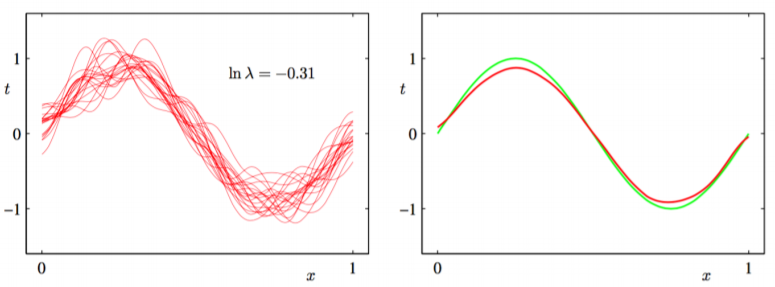

### 2)  Смещение и разброс композиции алгоритмов
При вычислении композиции базовых алгоритмов (с одинаковым смещением) смещение композиции совпадает со смещением отдельного базового алгоритма. Таким образом, поскольку деревья характеризуются низким смещением, то же самое будет верно и для композиции деревьев. Следовательно, композиции деревьев тоже способны восстанавливать сложные закономерности.
Разброс композиции уже отличается от разброса одного базового алгоритма:
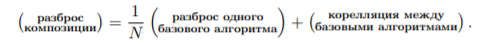

Фактически, композиция достаточного количества некоррелированных алгоритмов может дать идеальный
алгоритм. Но, к сожалению, базовые алгоритмы всегда получаются в той или иной степени коррелированы,
так как обучаются на подвыборках одной выборки. Таким образом, возникает необходимость уменьшения
корелляции базовых алгоритмов.

### 3) Уменьшение корреляции базовых алгоритмов
Существуют следующие два подхода по уменьшению корреляции базовых алгоритмов:
1. **Беггинг:** Обучение базовых алгоритмов происходит на случайных подвыборках обучающей выборки. Причем чем меньше размер случайной подвыборки, тем более независимыми получаются базовые алгоритмы.
2. **Метод случайных подпространств:** выбирается случайное подмножество признаков (столбцов матрицы «объекты–признаки») и очередной базовый алгоритм обучается только на этих признаках. Доля выбираемых признаков является гиперпараметром этого метода.

Два данных подхода — бэггинг и метод случайных подпространств — можно объединять и использовать
одновремено.

# Случайные леса
случайный лес - является одним из лучших способов объединения деревьев в композиции.

### 1) Случайный лес
Ранее были получены следующие результаты:
* Ошибка может быть разложена на смещение и разброс.
* Смещение композиции близко к смещению одного базового алгоритма.
* Разброс при построении композиции уменьшается, причем тем сильнее, чем менее коррелированы базовые алгоритмы.

Рассмотренных в прошлый раз способов понижения корреляции между базовыми алгоритмами (бэггинг и
метод случайных подпространств) оказывается недостаточно. Чтобы базовые алгоритмы были еще менее
скореллированными, имеет смысл сделать случайным их процесс построения.

### 2) Рандомизация процесса построения решающих деревьев
Пусть на некотором шаге алгоритма необходимо разбить вершину $m$, в которой оказалась выборка $X_m$, на две. В качестве условия разбиения используется сравнение $j-го$ признака с порогом $t$: $$[x^j \leqslant t]$$

Параметры $j$ и $t$ выбираются исходя из условия минимизации функции ошибки $Q(X_m, j, t)$: $$Q(X_m, j, t) \rightarrow \min_{j,t}$$

Рандомизировать процесс построения можно, если в задаче поиска оптимальных параметров выбирать $j$ из случайного подмножества признаков размера $q$. Оказывается, что этот подход действительно позволяет сделать деревья менее коррелированными.
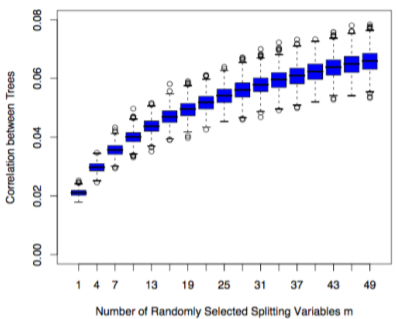
По графику видно, что чем меньше «простор для выбора лучшего разбиения», то есть чем меньше $q$, тем
меньше корреляции между получающимися решающими деревьями. Случай $q = 1$ соответствует абсолютно
случайному выбору признака.
Для $q$ есть некоторые рекомендации, которые неплохо работают на практике:
* В задаче регрессии имеет смысл брать $q = {d\over 3}$, то есть использовать треть от общего числа признаков.
* В задаче классификации имеет смысл брать $q = \sqrt{d}$.

### 3) Алгоритм построения случайного леса
**Чтобы построить случайный лес из N решающих деревьев, необходимо:**
1. Построить с помощью бутстрапа $N$ случайных подвыборок $\bar{X}_n, n = 1, ..., N$.
2. Каждая получившаяся подвыборка $\bar{X}_n$ используется как обучающая выборка для построения соответствующего решающего 
***
Причем:
- Дерево строится, пока в каждом листе окажется не более $n_{min}$ объектов. Очень часто деревья строят до конца $(n_{min} = 1)$, чтобы получить сложные и переобученные решающие деревья с низким смещением.
- Процесс построения дерева рандомизирован: на этапе выбора оптимального признака, по которому будет происходить разбиение, он ищется не среди всего множества признаков, а среди случайного подмножества размера $q$.
- Следует обратить особое внимание, что случайное подмножество размера $q$ выбирается заново каждый раз, когда необходимо разбить очередную вершину. В этом состоит основное отличие такого подхода от метода случайных подпространств, где случайное подмножество признаков выбиралось один раз перед построением базового алгоритма.
***
3. Построенные деревья объединяются в композицию:
***
* В задачах регрессии $ a(x) = {1\over{N}} \cdot \sum_{n=1}^N b_n(x) $
* В задачах классификации $ a(x) = sign ( {1\over{N}} \cdot \sum_{n=1}^N b_n(x)) $

**Одна из особенностей случайных лесов:** они не переобучаются при росте числа базовых алгоритмов.
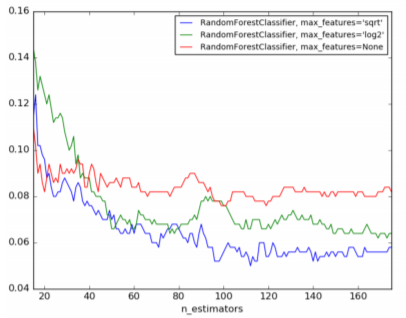
По графику видно, что ошибка на тесте сначала уменьшается с ростом числа базовых алгоритмов, а затем выходит на асимптоту. Не происходит роста ошибки при росте числа базовых алгоритмов.

# Бэггинг и случайный лес

In [1]:
import sklearn.datasets
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

import numpy as np
import seaborn as sns

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

Загрузим датасет digits с помощью функции load_digits из sklearn.datasets и подготовим матрицу признаков X и ответы на обучающей выборке y

In [3]:
digits = sklearn.datasets.load_digits()
print(digits.data.shape)
print(digits.DESCR)

(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted 

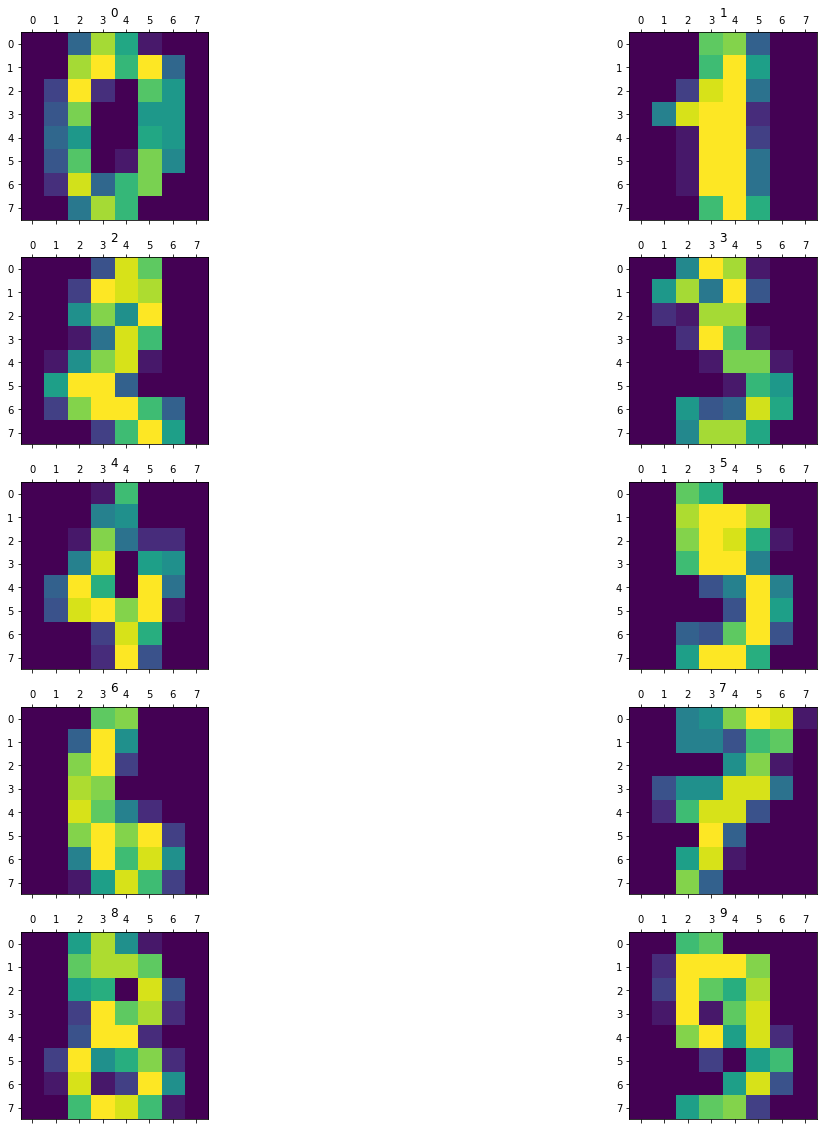

In [4]:
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (20,20))

k = 0
for i in range(5):
    for j in range(2):
        axes[i][j].matshow(digits.images[k])
        axes[i][j].set(title = k)
        k+=1

In [5]:
X = digits.data
y = digits.target
print(y)

[0 1 2 ... 8 9 8]


In [6]:
print(X)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [7]:
X.shape

(1797, 64)

Для оценки качества далее будем использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Будем использовать k=10, чтобы полученные оценки качества имели небольшой разброс.

### 1.

Создадим DecisionTreeClassifier с настройками по умолчанию и измерим качество его работы с помощью cross_val_score.

In [8]:
dt_classifier = DecisionTreeClassifier()

cvs = cross_val_score(dt_classifier, X, y, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.80555556 0.83333333 0.84444444 0.78888889 0.76666667 0.86666667
 0.88888889 0.84357542 0.82122905 0.81564246]
Mean model quality value: 0.8274891371818747


### 2.

Воспользуемся BaggingClassifier из sklearn.ensemble, чтобы обучить беггинг над DecisionTreeClassifier. Используем в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

In [9]:
bagging_classifier = BaggingClassifier(dt_classifier, n_estimators=100)

cvs = cross_val_score(bagging_classifier, X, y, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.86666667 0.95       0.90555556 0.92222222 0.93333333 0.97777778
 0.95555556 0.91061453 0.88268156 0.9273743 ]
Mean model quality value: 0.9231781502172562


### 3.

Теперь изучим параметры BaggingClassifier и выберем их такими, чтобы каждый базовый алгоритм обучался не на всех $d$ признаках, а на $\sqrt{d}$ случайных признаков. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает выбирать любое другое число случайных признаков.

In [10]:
n_features = digits.data.shape[1]
bagging = BaggingClassifier(dt_classifier, n_estimators=100, max_features=int(np.sqrt(n_features)))

cvs = cross_val_score(bagging, X, y, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.9        0.97777778 0.93333333 0.87222222 0.95       0.95555556
 0.95555556 0.97206704 0.91061453 0.91061453]
Mean model quality value: 0.9337740533829917


### 4.

Теперь попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Будем выбирать опять же $\sqrt{d}$ признаков.

In [11]:
dt_classifier = DecisionTreeClassifier(max_features=int(np.sqrt(n_features)))
bagging = BaggingClassifier(dt_classifier, n_estimators=100)

cvs = cross_val_score(bagging, X, y, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.91111111 0.97777778 0.93888889 0.95       0.95555556 0.96111111
 0.97222222 0.95530726 0.93296089 0.93854749]
Mean model quality value: 0.9493482309124767


### 5.

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble.

In [12]:
rf_classifier = RandomForestClassifier()

cvs = cross_val_score(rf_classifier, X, y, cv=10)

print(cvs)
print('Mean model quality value: ' + str(cvs.mean()))

[0.91666667 0.97222222 0.95555556 0.92777778 0.96111111 0.97777778
 0.97222222 0.96648045 0.93296089 0.94972067]
Mean model quality value: 0.9532495344506516


### Плюшка (Grid Search)


In [13]:
from sklearn import model_selection

In [14]:
rf_classifier.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [15]:
parameters_grid = {
    'n_estimators' : np.arange(100, 150),
    'max_features' : ["auto", "sqrt", "log2"],
    'bootstrap' : [True, False],
    'criterion' : ["gini", "entropy"],
}

In [16]:
randomized_grid_cv = model_selection.RandomizedSearchCV(rf_classifier, parameters_grid, scoring = 'accuracy', cv = 10, n_iter = 20, 
                                                   random_state = 0)

In [17]:
%%time
randomized_grid_cv.fit(X, y)

Wall time: 1min 21s


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])},
                   random_state=0, scoring='accuracy')

In [18]:
print(randomized_grid_cv.best_score_)
print(randomized_grid_cv.best_params_)

0.958814400993172
{'n_estimators': 134, 'max_features': 'log2', 'criterion': 'gini', 'bootstrap': False}


## Визуализация данных (t-SNE подход)

интересная статья: https://colah.github.io/posts/2014-10-Visualizing-MNIST/

In [19]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

Wall time: 11.2 s


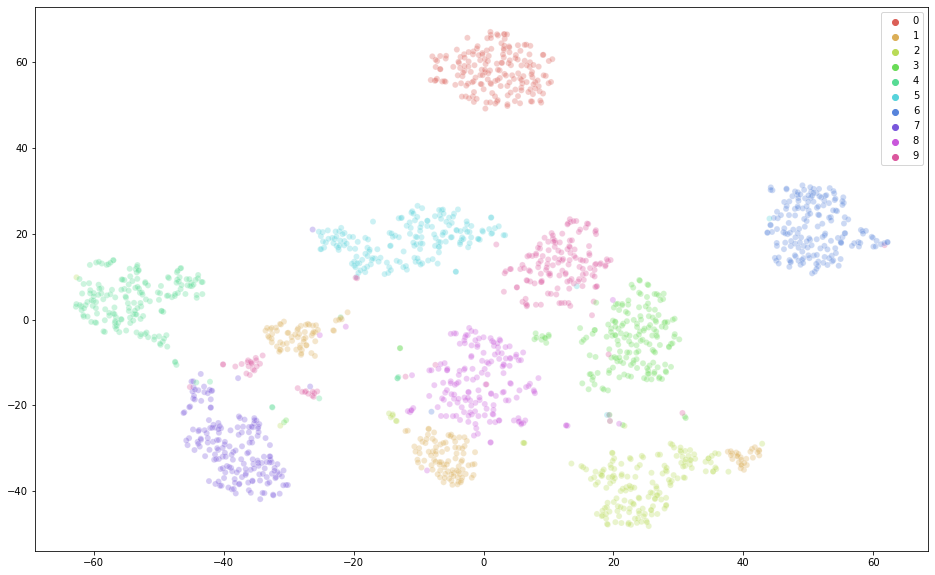

In [23]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_representation[:, 0], y=tsne_representation[:, 1],
    hue = y,
    palette=sns.color_palette("hls", 10),
    data=X,
    legend="full",
    alpha=0.3
)